<a href="https://colab.research.google.com/github/nirajlondhe8/aiml/blob/main/ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import ResNet50
model = ResNet50(weights='imagenet', include_top=False)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
from google.colab import files
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

# Upload image file
uploaded = files.upload()

# Load the image file
img_path = list(uploaded.keys())[0]  # Get the name of the uploaded file
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Now you can proceed with your model prediction or visualization


Saving refrigerator-fully-stocked-with-ingredients-readytocook-dishes-created-with-generative-ai_124507-166396.jpg to refrigerator-fully-stocked-with-ingredients-readytocook-dishes-created-with-generative-ai_124507-166396.jpg


In [4]:
for layer in model.layers:
    print(layer.name)


input_layer
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
co

In [6]:
from keras.models import Model

layer_outputs = [model.layers[i].output for i in range(len(model.layers))]
activation_model = Model(inputs=model.input, outputs=layer_outputs)


In [7]:
activations = activation_model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


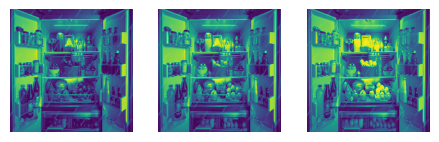

In [8]:
import matplotlib.pyplot as plt

first_layer_activation = activations[0]  # Activations from the first layer
num_filters = first_layer_activation.shape[-1]

plt.figure(figsize=(15, 15))
for i in range(num_filters):
    plt.subplot(8, 8, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


**Custom** **Training**

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_data, train_labels), (val_data, val_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_data = train_data.astype('float32') / 255.0
val_data = val_data.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
val_labels = to_categorical(val_labels, 10)

# Define a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3732 - loss: 1.7131 - val_accuracy: 0.5796 - val_loss: 1.1875
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5923 - loss: 1.1595 - val_accuracy: 0.6374 - val_loss: 1.0481
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6525 - loss: 1.0046 - val_accuracy: 0.6397 - val_loss: 1.0203
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6802 - loss: 0.9162 - val_accuracy: 0.6746 - val_loss: 0.9402
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7029 - loss: 0.8525 - val_accuracy: 0.6843 - val_loss: 0.9333
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.7268 - loss: 0.7914 - val_accuracy: 0.6968 - val_loss: 0.8988
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.7398 - loss: 0.7420 - val_accuracy: 0.6946 - val_loss: 0.8970
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7571 -

 Practical Use Case
In an industrial context, the model could be used to:

Automate fault detection: Automatically identify issues in real-time based on the logs generated by the SMF during operation.
Improve network reliability: By detecting issues early, engineers can proactively address them before they impact service quality.
Optimize network performance: Identifying anomalies can help optimize resource allocation in the network.

Using the intelligence gained from visualizing feature maps and layer activations in CNNs has several practical industrial applications across various domains. Here are a few key use cases:

1. Quality Control in Manufacturing
Defect Detection: CNNs trained to detect defects in products can output feature map activations to highlight where anomalies or defects appear in an image of a manufactured item. By visualizing these activations, engineers can better understand whether the model is focusing on defective parts (e.g., cracks, misaligned components), and fine-tune it if necessary.
Automated Inspection Systems: Industries like electronics and automotive manufacturing rely on computer vision to assess product quality. Visualizing feature maps ensures that the CNN is learning to identify key quality features (e.g., surface integrity, component assembly).
2. Healthcare Imaging
Medical Diagnostics: In medical imaging (e.g., X-rays, MRI scans), CNNs help in identifying anomalies such as tumors or fractures. Outputting activations can allow doctors to see which areas of the scan the model is focusing on. This enhances transparency and provides an added layer of verification for decisions made by AI.
Drug Discovery: For models trained to analyze cellular structures, activations can provide insights into how the model interprets biological images, leading to improved pattern recognition in drug discovery processes.
3. Autonomous Vehicles
Object Detection and Scene Understanding: Autonomous vehicles rely on CNNs for object detection and navigation. Visualizing the activations can ensure the model is correctly identifying road features, pedestrians, and other vehicles. This allows engineers to optimize the model for complex real-world environments.
Safety Mechanisms: By analyzing the activations in different driving scenarios, car manufacturers can ensure the AI responds appropriately to potentially hazardous situations.
4. Security and Surveillance
Facial Recognition and Behavior Monitoring: CNNs used in facial recognition systems can benefit from visualizing activations to ensure accurate identification and to reduce bias. This is crucial for ensuring that systems used in surveillance do not produce biased or erroneous results.
Intruder Detection: Activations can be analyzed to verify whether the model correctly distinguishes between normal and suspicious behavior, improving the accuracy of surveillance systems in industrial environments or public spaces.
5. Retail and E-commerce
Visual Search and Product Recognition: In online shopping platforms, CNNs are used for visual search (matching products based on an image). Activations can be visualized to ensure the model focuses on critical product features like color, texture, or brand logos, enhancing user experience.
Shelf Monitoring: Retailers use cameras to monitor shelf stock. CNNs can process these images, and visualizing the feature maps helps optimize the model for detecting low stock or misplaced items.
6. Agriculture
Crop and Pest Monitoring: CNNs are used to monitor crop health and detect pests. By examining the activations, farmers can understand if the model is correctly identifying early signs of plant disease or pest infestation, enabling timely interventions.
Precision Farming: Feature maps can assist in fine-tuning models that control autonomous farm equipment, ensuring they correctly recognize crops and soil conditions.
7. Robotics
Object Manipulation: Robots need CNNs to recognize and interact with objects. Visualizing activations helps optimize how robots perceive objects in real-world environments, improving grasping, sorting, and manipulation tasks.
Navigation: In warehouses and industrial settings, robots rely on vision systems to navigate and avoid obstacles. Ensuring the feature maps focus on relevant objects helps improve efficiency and safety in these environments.

how to use image classification models in Keras for various tasks:



Classify an Image with ResNet50: Load and preprocess the image, make predictions, and decode the top results:

In [13]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.utils import load_img, img_to_array
import numpy as np

model = ResNet50(weights='imagenet')
img = load_img('refrigerator-fully-stocked-with-ingredients-readytocook-dishes-created-with-generative-ai_124507-166396.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n04070727', 'refrigerator', 0.9852578), ('n04525305', 'vending_machine', 0.0057084104), ('n04111531', 'rotisserie', 0.0029711702)]


Extract Features with VGG16: Exclude the final classification layer to use it for feature extraction:



In [15]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import load_img, img_to_array
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
img = load_img('refrigerator-fully-stocked-with-ingredients-readytocook-dishes-created-with-generative-ai_124507-166396.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


Extract Intermediate Layer Features (VGG19): Customize the output layer to extract features from a specific layer:



In [17]:
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model
from keras.utils import load_img, img_to_array
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img = load_img('refrigerator-fully-stocked-with-ingredients-readytocook-dishes-created-with-generative-ai_124507-166396.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Fine-tune InceptionV3 on Custom Classes: Add custom layers to InceptionV3 and fine-tune a subset of layers:



In [19]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import SGD

# Load the base model
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(200, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Fine-tune top inception blocks after freezing the rest
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# Compile the model with the correct learning rate argument
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy')


Use InceptionV3 with a Custom Input Tensor: Set a custom input shape and use InceptionV3 for classification:



In [20]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

input_tensor = Input(shape=(224, 224, 3))
model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Problem statement :  visualizing the feature maps from the ResNet50 model and as extended problem see how to use this intelligence for industry use.

Original image:

Approach: Uploaded refrigerator image file, instantiated pre-trained deep learning ResNet50 model, selected layers to visualize, create a new model that outputs the activations of the interested layer, ran the image through the model to get the activations for the selected layers, used Matplotlib to visualize the feature maps

Feautre Map's visualizaiton

Results:

Predicted: [('n04070727', 'refrigerator', 0.9852578),
            ('n04525305', 'vending_machine', 0.0057084104),
             ('n04111531', 'rotisserie', 0.0029711702)]

After processing an image through a trained model, found

Predicted Class: ('n04070727', 'refrigerator', 0.9852578)
Second Prediction: ('n04525305', 'vending_machine', 0.0057084104)
Third Prediction: ('n04111531', 'rotisserie', 0.0029711702)

This output indicates that the model is highly confident (98.53%) that the image is of a refrigerator, with much lower confidence in the other classes.

Using the intelligence gained from visualizing feature maps and layer activations in CNNs has several practical industrial applications across various domains. Here are a few key use cases:

Quality Control in Manufacturing Defect Detection
Healthcare Imaging Medical Diagnostics
Autonomous Vehicles Object Detection and Scene Understanding
Security and Surveillance Facial Recognition and Behavior Monitoring
Retail and E-commerce Visual Search and Product Recognition
Agriculture Crop and Pest Monitoring
Robotics Object Manipulation: